# What is Tokenization?

Imagine you're trying to teach a child to read. Instead of diving straight into complex paragraphs, you'd start by introducing them to individual letters, then syllables, and finally, whole words. In a similar vein, tokenization breaks down vast stretches of text into more digestible and understandable units for machines.

The primary goal of tokenization is to represent text in a manner that's meaningful for machines without losing its context. By converting text into tokens, algorithms can more easily identify patterns. This pattern recognition is crucial because it makes it possible for machines to understand and respond to human input. For instance, when a machine encounters the word "running", it doesn't see it as a singular entity but rather as a combination of tokens that it can analyze and derive meaning from.


Lets start with word based tokenization ...

In [115]:
import re
sentence = "Hi, welcome to the my hands-on NLP practice session, let's get started!. Let's go!"
sentence = sentence.lower()
#lets remove the punctuation if we have any
sentence = re.sub(r'[^\w\s]', '', sentence)
print(sentence)
#lets split the sentence into words
tokens = sentence.split()
print(tokens)

hi welcome to the my handson nlp practice session lets get started lets go
['hi', 'welcome', 'to', 'the', 'my', 'handson', 'nlp', 'practice', 'session', 'lets', 'get', 'started', 'lets', 'go']


Character-based tokenizers split the text into characters, rather than words. This has two primary benefits:

1. The vocabulary is much smaller.
2. There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

However, some questions arise concerning spaces and punctuation.

Lets continiue with example.

In [116]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("google/byt5-small")

In [117]:
print(tokenizer.tokenize(sentence))
print(len(tokenizer.tokenize(sentence)))

['h', 'i', ' ', 'w', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'm', 'y', ' ', 'h', 'a', 'n', 'd', 's', 'o', 'n', ' ', 'n', 'l', 'p', ' ', 'p', 'r', 'a', 'c', 't', 'i', 'c', 'e', ' ', 's', 'e', 's', 's', 'i', 'o', 'n', ' ', 'l', 'e', 't', 's', ' ', 'g', 'e', 't', ' ', 's', 't', 'a', 'r', 't', 'e', 'd', ' ', 'l', 'e', 't', 's', ' ', 'g', 'o']
74


In [118]:
tokenizer = AutoTokenizer.from_pretrained("google/canine-s")

tokens = tokenizer.tokenize(sentence)
token_i= tokenizer.encode(sentence)
print(token_i)
print(tokens)
len(tokens)
decode_chars = tokenizer.decode(token_i)
print(decode_chars)


[57344, 104, 105, 32, 119, 101, 108, 99, 111, 109, 101, 32, 116, 111, 32, 116, 104, 101, 32, 109, 121, 32, 104, 97, 110, 100, 115, 111, 110, 32, 110, 108, 112, 32, 112, 114, 97, 99, 116, 105, 99, 101, 32, 115, 101, 115, 115, 105, 111, 110, 32, 108, 101, 116, 115, 32, 103, 101, 116, 32, 115, 116, 97, 114, 116, 101, 100, 32, 108, 101, 116, 115, 32, 103, 111, 57345]
['h', 'i', ' ', 'w', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'm', 'y', ' ', 'h', 'a', 'n', 'd', 's', 'o', 'n', ' ', 'n', 'l', 'p', ' ', 'p', 'r', 'a', 'c', 't', 'i', 'c', 'e', ' ', 's', 'e', 's', 's', 'i', 'o', 'n', ' ', 'l', 'e', 't', 's', ' ', 'g', 'e', 't', ' ', 's', 't', 'a', 'r', 't', 'e', 'd', ' ', 'l', 'e', 't', 's', ' ', 'g', 'o']
hi welcome to the my handson nlp practice session lets get started lets go


Given 2 example is charater Tokenization.

Another thing to consider is that we’ll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.


There s another approach to bring 2 worlds together : SUBword Tokenization

Lets go for example

In [119]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [120]:
tokens = tokenizer.tokenize(sentence)
input_ids = tokenizer.encode(sentence)
print(tokens)
print(len(tokens))
print(input_ids)

['hi', 'welcome', 'to', 'the', 'my', 'hands', '##on', 'n', '##l', '##p', 'practice', 'session', 'lets', 'get', 'started', 'lets', 'go']
17
[101, 20844, 7236, 1106, 1103, 1139, 1493, 1320, 183, 1233, 1643, 2415, 4912, 11446, 1243, 1408, 11446, 1301, 102]


In [121]:
decode_string= tokenizer.decode(input_ids)
print(decode_string)

[CLS] hi welcome to the my handson nlp practice session lets get started lets go [SEP]


Bam Bam Bam Bam 

in between you can do Stemming (removing suffixes) or Lemmatization(word in distionary based form) ...
Stemming = running -> run
Lemmatization = cats -> cat or happily -> happily POS tags needed for lemmatization
Stemming is quick and dirty but Lemmatization increase accuracy and slow.
all there happining after tokenization .. 
lets jump  to example ...

In [122]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
ps = PorterStemmer()

In [124]:
example_words = ["program","programming","programer","programs","programmed"]
print("Stemming words:")
for w in example_words:
    print(w, ":", ps.stem(w))
print("lemmatizing words:")
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()
example_words = ["program","programming","programer","programs","programmed"]
print("Lemmatizing words:")
for w in example_words:
    print(w, ":", wnl.lemmatize(w))


Stemming words:
program : program
programming : program
programer : program
programs : program
programmed : program
lemmatizing words:
Lemmatizing words:
program : program
programming : programming
programer : programer
programs : program
programmed : programmed


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jalil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Vectorization

Vectorization is the process of converting text into numerical representation so that machines can understand and process it. Here are some reasons why vectorization is needed:

- **Machines cant understand text, only numbers:** Computers and machine learning models require numerical input to perform computations and make predictions.
- **Better model performance:** Well-chosen vectorization techniques can significantly improve the accuracy and performance of NLP models.
- **Impact on NLP results:** Different vectorization methods can lead to varying results in NLP tasks, making it crucial to select the appropriate technique for the specific application.

Let's explore some common vectorization methods and their impact on NLP results.

There are multiple ways to transform text ito vector ...

lets start with One-Hot Encoding ( Sparse )

In [125]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [126]:
tokens = np.array(tokens).reshape(-1, 1)
print(tokens)

[['hi']
 ['welcome']
 ['to']
 ['the']
 ['my']
 ['hands']
 ['##on']
 ['n']
 ['##l']
 ['##p']
 ['practice']
 ['session']
 ['lets']
 ['get']
 ['started']
 ['lets']
 ['go']]


In [127]:
encoder = OneHotEncoder()
onehot_vector = encoder.fit_transform(tokens)
print(onehot_vector)
"""
Its simple and interpretable, but it has a few drawbacks:
1. It creates a sparse matrix, which can be inefficient for large vocabularies.
2. It doesn't capture any semantic relationships between words. For example, "king" and "queen" would be treated as completely different entities, even though they are related in meaning.
3. It doesn't handle out-of-vocabulary words well. If a word isn't in the vocabulary, it can't be represented at all.
"""

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17 stored elements and shape (17, 16)>
  Coords	Values
  (0, 6)	1.0
  (1, 15)	1.0
  (2, 14)	1.0
  (3, 13)	1.0
  (4, 8)	1.0
  (5, 5)	1.0
  (6, 1)	1.0
  (7, 9)	1.0
  (8, 0)	1.0
  (9, 2)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 7)	1.0
  (13, 3)	1.0
  (14, 12)	1.0
  (15, 7)	1.0
  (16, 4)	1.0


'\nIts simple and interpretable, but it has a few drawbacks:\n1. It creates a sparse matrix, which can be inefficient for large vocabularies.\n2. It doesn\'t capture any semantic relationships between words. For example, "king" and "queen" would be treated as completely different entities, even though they are related in meaning.\n3. It doesn\'t handle out-of-vocabulary words well. If a word isn\'t in the vocabulary, it can\'t be represented at all.\n'

In [128]:
#lets represent in a dense format
dense_vector = onehot_vector.toarray()
print(dense_vector)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
"""
Now ,we go for bag of words (BoW is sparse) representation.
Bag of Words (BoW) is a simple and commonly used method for feature extraction in natural language processing (NLP). It represents text data as a collection of words, disregarding the grammar and word order but keeping track of the frequency of each word. This representation is often used in text classification tasks and other NLP applications.
The main idea behind BoW is to create a vocabulary of all unique words in the text corpus and then represent each document as a vector of word counts or binary values (indicating the presence or absence of words). This allows us to convert text data into a numerical format that can be used for machine learning algorithms.
there are two types of bag of words representation:
1. Count Vectorization: In this approach, each word in the vocabulary is assigned a unique index, and the document is represented as a vector of word counts. The length of the vector is equal to the size of the vocabulary, and each element in the vector represents the count of that word in the document.
2. Binary Vectorization: In this approach, each word in the vocabulary is again assigned a unique index, but the document is represented as a binary vector. Each element in the vector indicates whether the corresponding word is present (1) or absent (0) in the document.

we give the example of count vectorization.
pros:
1. Simple and easy to implement.
2. Effective for text classification tasks.
3. Can capture word frequency information.
4. Works well with small to medium-sized datasets.
cons:
1. High dimensionality: The size of the feature vector can be very large, especially for large vocabularies, leading to sparse representations.
2. Loss of semantic information: BoW ignores the order and context of words, which can lead to loss of important semantic relationships between words.
3. Sensitivity to noise: BoW can be sensitive to noise in the data, such as misspellings or irrelevant words, which can affect the quality of the feature representation.
"""

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([sentence])
print(X.toarray())

[[1 1 1 1 2 1 1 1 1 1 1 1 1]]


   get  go  handson  hi  lets  my  nlp  practice  session  started  the  to  \
0    1   1        1   1     2   1    1         1        1        1    1   1   

   welcome  
0        1  


Text(8.222222222222223, 0.5, 'Document Index')

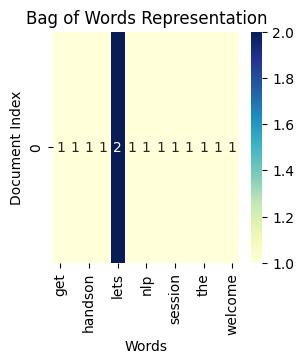

In [133]:
#lets convert the bag of words representation to a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Convert the sparse matrix to a dense format
dense_X = X.toarray()

# Create the DataFrame with the correct shape
df = pd.DataFrame(dense_X, columns=vectorizer.get_feature_names_out())
print(df.head())

#visualizing the bag of words representation
plt.figure(figsize=(3, 3))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Bag of Words Representation")
plt.xlabel("Words")
plt.ylabel("Document Index")


[[0.25 0.25 0.25 0.25 0.5  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]]
    get    go  handson    hi  lets    my   nlp  practice  session  started  \
0  0.25  0.25     0.25  0.25   0.5  0.25  0.25      0.25     0.25     0.25   

    the    to  welcome  
0  0.25  0.25     0.25  


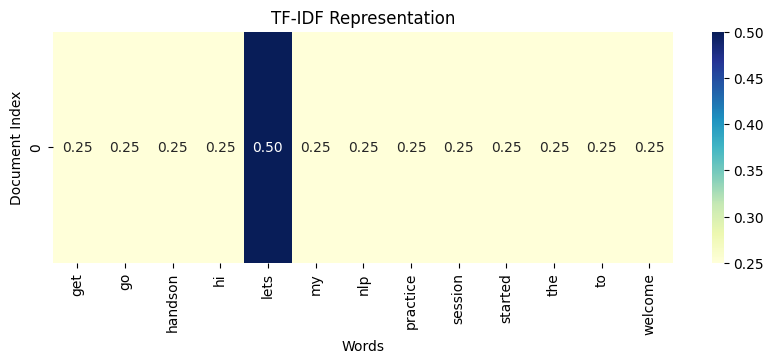

In [138]:
"""
Lets go now for TF-IDF representation.
TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It is commonly used in information retrieval and text mining to evaluate the significance of words in a document. TF-IDF is particularly useful for tasks such as text classification, clustering, and information retrieval.
The TF-IDF representation consists of two main components: 
1. Term Frequency (TF): This measures how frequently a word appears in a document. It is calculated as the ratio of the number of times a word appears in a document to the total number of words in that document. The formula for TF is:
   TF(word, document) = (Number of times word appears in document) / (Total number of words in document)
2. Inverse Document Frequency (IDF): This measures how important a word is across the entire corpus. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the word. The formula for IDF is:
   IDF(word, corpus) = log(Total number of documents / Number of documents containing the word)
TF-IDF is calculated by multiplying the TF and IDF values:
TF-IDF(word, document, corpus) = TF(word, document) * IDF(word, corpus)
The resulting TF-IDF value indicates the importance of a word in a document relative to the entire corpus. A higher TF-IDF value suggests that the word is more relevant to the document and less common across the corpus.
pros:
1. Considers both term frequency and document frequency, providing a more informative representation of word importance.   
2. Reduces the impact of common words (stop words) that may not carry significant meaning.
3. Works well for text classification and information retrieval tasks.
4. Can be used with various machine learning algorithms.
cons:
1. Still suffers from high dimensionality, especially with large vocabularies.
2. Sensitive to noise and irrelevant words in the data.
3. Does not capture word order or context, similar to Bag of Words.
"""

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_X = tfidf_vectorizer.fit_transform([sentence])
print(tfidf_X.toarray())
# Convert the sparse matrix to a dense format
dense_tfidf_X = tfidf_X.toarray()
# Create the DataFrame with the correct shape
df_tfidf = pd.DataFrame(dense_tfidf_X, columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf.head())
#visualizing the tf-idf representation
plt.figure(figsize=(10, 3))
sns.heatmap(df_tfidf, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("TF-IDF Representation")
plt.xlabel("Words")
plt.ylabel("Document Index")
plt.show()


In [ ]:
"""
Lets go with Word2Vec representation.
Word2Vec is a popular word embedding technique that represents words as dense vectors in a continuous vector space. It captures semantic relationships between words based on their context in a large corpus of text. Word2Vec is widely used in natural language processing (NLP) tasks, such as text classification, sentiment analysis, and information retrieval.
Word2Vec uses two main architectures to learn word embeddings: Continuous Bag of Words (CBOW) and Skip-Gram. Both architectures are based on the idea that words that appear in similar contexts tend to have similar meanings.
1. Continuous Bag of Words (CBOW): In this architecture, the model predicts a target word based on its surrounding context words. It takes a set of context words as input and tries to predict the target word in the center. The model learns to represent words in such a way that similar context words have similar vector representations.
2. Skip-Gram: In this architecture, the model does the opposite of CBOW. It takes a target word as input and tries to predict the surrounding context words. The model learns to represent words in such a way that similar target words have similar vector representations.
pros:
1. Captures semantic relationships between words, allowing for better understanding of word meanings and context.For example, "king" and "queen" will not be treated as completely different entities, but rather as related words in the vector space.
2. Reduces dimensionality compared to traditional methods like Bag of Words and TF-IDF.
3. Can handle out-of-vocabulary words by using subword information.
4. Can be pre-trained on large corpora and fine-tuned on specific tasks.
5. Works well for various NLP tasks, including text classification, sentiment analysis, and information retrieval.
cons:
1. Requires a large amount of training data to produce high-quality embeddings.
2. Sensitive to hyperparameters, such as window size and vector dimensionality.
3. Does not capture word order or syntax, as it treats words as independent entities.
4. May not perform well on small datasets or when the vocabulary is limited.
5. Pre-trained models may not be suitable for domain-specific tasks without fine-tuning.
"""
#https://israelg99.github.io/2017-03-23-Word2Vec-Explained/
#https://www.tensorflow.org/text/tutorials/word2vec



In [ ]:
"""Lets go with GloVe representation.

GloVe (Global Vectors for Word Representation) is another popular word embedding technique that represents words as dense vectors in a continuous vector space. It captures semantic relationships between words based on their co-occurrence statistics in a large corpus of text. GloVe is widely used in natural language processing (NLP) tasks, such as text classification, sentiment analysis, and information retrieval.
For example, how GLoVe works:
1. Co-occurrence Matrix: GloVe starts by creating a co-occurrence matrix that counts how often words appear together in a given context window. The matrix captures the frequency of word pairs in the corpus.
2. Ratio of Co-occurrences: GloVe uses the ratios of co-occurrences to derive word embeddings. It assumes that the ratio of probabilities of co-occurrence between words can be used to learn their vector representations.
3. Optimization: GloVe optimizes the word vectors by minimizing the difference between the dot product of the word vectors and the logarithm of the co-occurrence probabilities. This allows GloVe to learn word embeddings that capture semantic relationships based on their co-occurrence patterns.

"""
#https://nlp.stanford.edu/projects/glove/
#lets jump to demo
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# download glove and unzip it in Notebook.
!wget http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip
!unzip -q glove.6B.zip
 
# vocab: 'the': 1, mapping of words with
# integers in seq. 1,2,3..
# embedding: 1->dense vector
# number of unique words in dict.
#run it with CUDA
x = tokens.flatten().tolist()
print(x)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_index = tokenizer.word_index
print("Number of unique words in dictionary=", 
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)


def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1
     
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
 
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
 
    return embedding_matrix_vocab
 
file = 'NLP_playground/glove.6B.50d.txt'
# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab(
    file, tokenizer.word_index,
  embedding_dim)
 
print("Dense vector for first word is => ",
      embedding_matrix_vocab[1])

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


['hi', 'welcome', 'to', 'the', 'my', 'hands', '##on', 'n', '##l', '##p', 'practice', 'session', 'lets', 'get', 'started', 'lets', 'go']
Number of unique words in dictionary= 16
Dictionary is =  {'lets': 1, 'hi': 2, 'welcome': 3, 'to': 4, 'the': 5, 'my': 6, 'hands': 7, 'on': 8, 'n': 9, 'l': 10, 'p': 11, 'practice': 12, 'session': 13, 'get': 14, 'started': 15, 'go': 16}
Dense vector for first word is =>  [ 0.30423    -0.24405     1.03030002  0.039387    0.23262    -0.39686
 -0.36583    -0.18573     0.31051001  0.48486    -0.035048    0.76138002
  0.42607999  0.58651     0.35600999  0.73255998 -0.092297   -0.1974
  0.79830003 -1.15690005  0.43522999  0.26190001 -0.45631     1.1645
  0.75410002 -0.89915001  0.068323   -0.40340999  0.53135002 -1.16869998
  1.82539999  0.40052    -0.76422    -0.076685   -0.26668999  0.25650001
 -0.048207   -0.46384999 -0.037947   -0.94777     0.90609998  0.28996
  0.096715    0.55769998 -0.1583     -0.043148    1.04209995 -0.43296
 -0.096168    0.43463001]


In [ ]:
""" Tranformer based word embedding

Transformer-based word embeddings are a type of word representation that leverages the power of transformer architectures, such as BERT (Bidirectional Encoder Representations from Transformers), GPT (Generative Pre-trained Transformer), and others. These embeddings capture contextual information and semantic relationships between words in a more sophisticated manner compared to traditional methods like Word2Vec or GloVe.
Transformer-based embeddings are generated by training large-scale transformer models on vast amounts of text data. The key idea is to use self-attention mechanisms to understand the relationships between words in a sentence, allowing the model to capture context and meaning more effectively.

"""
%pip install numpy
%pip install transformers
import numpy as np
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

model = BertModel.from_pretrained("bert-base-uncased")

inputs = tokenizer(sentence, return_tensors="pt")

# Extract word embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Get the embedding for the [CLS] token (sentence representation)
sentence_embedding = outputs.last_hidden_state[:, 0, :]
print(sentence_embedding.shape)  # Output: (1, 768)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\jalil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_l

AttributeError: _ARRAY_API not found

RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
Failed to import transformers.generation.utils because of the following error (look up to see its traceback):
numpy.core.multiarray failed to import

In [17]:
import numpy
print(numpy.__version__)


2.1.3
